In [1]:
#Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.4f}'.format
%matplotlib inline
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#The CSV file is imported using the read_csv command given below:
Countrydf = pd.read_csv("Country-data.csv")

In [3]:
#The first ten rows of the loan Dataframe are displayed below:
Countrydf.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200
5,Argentina,14.5000,18.9000,8.1000,16.0000,18700,20.9000,75.8000,2.3700,10300
6,Armenia,18.1000,20.8000,4.4000,45.3000,6700,7.7700,73.3000,1.6900,3220
7,Australia,4.8000,19.8000,8.7300,20.9000,41400,1.1600,82.0000,1.9300,51900
8,Austria,4.3000,51.3000,11.0000,47.8000,43200,0.8730,80.5000,1.4400,46900
9,Azerbaijan,39.2000,54.3000,5.8800,20.7000,16000,13.8000,69.1000,1.9200,5840


In [4]:
#The DataFrame is analysed using the below commands. 
print(Countrydf.shape)
print(Countrydf.info())
Countrydf.describe()

(167, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB
None


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,41.1090,6.8157,46.8902,"17,144.6886",7.7818,70.5557,2.9480,"12,964.1557"
std,40.3289,27.4120,2.7468,24.2096,"19,278.0677",10.5707,8.8932,1.5138,"18,328.7048"
min,2.6000,0.1090,1.8100,0.0659,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,23.8000,4.9200,30.2000,"3,355.0000",1.8100,65.3000,1.7950,"1,330.0000"
50%,19.3000,35.0000,6.3200,43.3000,"9,960.0000",5.3900,73.1000,2.4100,"4,660.0000"
75%,62.1000,51.3500,8.6000,58.7500,"22,800.0000",10.7500,76.8000,3.8800,"14,050.0000"
max,208.0000,200.0000,17.9000,174.0000,"125,000.0000",104.0000,82.8000,7.4900,"105,000.0000"


# The percentage of missing values in the loan dataframe is calculated below

In [5]:
round(100*(Countrydf.isnull().sum()/len(Countrydf.index)),2)

country      0.0000
child_mort   0.0000
exports      0.0000
health       0.0000
imports      0.0000
income       0.0000
inflation    0.0000
life_expec   0.0000
total_fer    0.0000
gdpp         0.0000
dtype: float64

### Data manipulation

In [6]:
# converting inflation to abolute value
Countrydf["inflation"]=Countrydf["inflation"]*Countrydf["gdpp"]/100

# Initail data analysis

child mortality


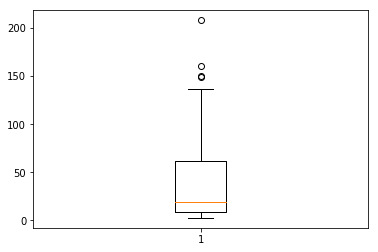

In [7]:
#Box plot of child mortality
plt.boxplot(Countrydf.child_mort)  
print("child mortality")

exports


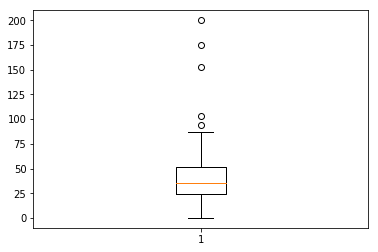

In [8]:
#Box plot of exports 
plt.boxplot(Countrydf.exports)  
print("exports")

health


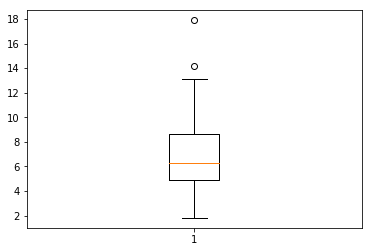

In [9]:
#Box plot of health
plt.boxplot(Countrydf.health)  
print("health")

income


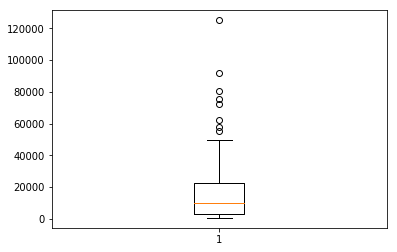

In [10]:
#Box plot of income
plt.boxplot(Countrydf.income)  
print("income")

inflation


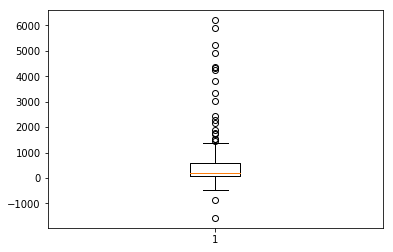

In [11]:
#Box plot of inflation
plt.boxplot(Countrydf.inflation)
print("inflation")

life_expec


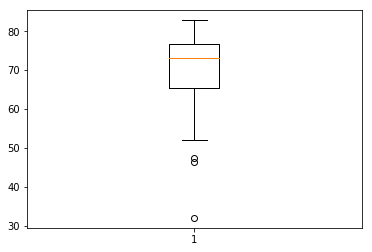

In [12]:
#Box plot of life_expec
plt.boxplot(Countrydf.life_expec)
print("life_expec")

life_expec


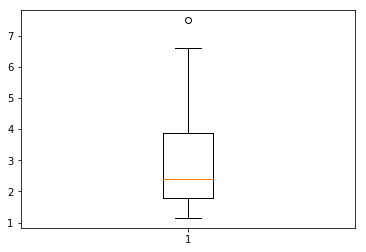

In [13]:
#Box plot of total_fer
plt.boxplot(Countrydf.total_fer)
print("life_expec")

gdpp


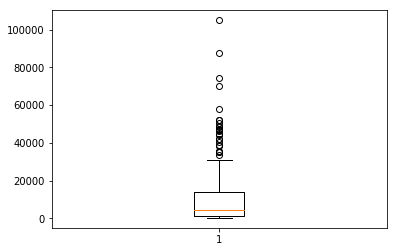

In [14]:
#Box plot of gdpp
plt.boxplot(Countrydf.gdpp)
print("gdpp")

imports


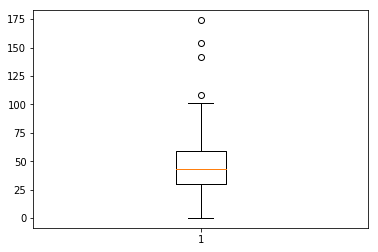

In [15]:
#Box plot of imports
plt.boxplot(Countrydf.imports)
print("imports")

outlier detected in all Columns

In [16]:
#correlation plot
corr = Countrydf.corr()
corr.style.background_gradient()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1,-0.318093,-0.200402,-0.127211,-0.524315,-0.173375,-0.886676,0.848478,-0.483032
exports,-0.318093,1,-0.114408,0.737381,0.516784,0.227577,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1,0.0957167,0.129579,-0.176408,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.0957167,1,0.122406,-0.13675,0.0543905,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1,0.60806,0.611962,-0.50184,0.895571
inflation,-0.173375,0.227577,-0.176408,-0.13675,0.60806,1,0.219201,-0.123937,0.441413
life_expec,-0.886676,0.316313,0.210692,0.0543905,0.611962,0.219201,1,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.50184,-0.123937,-0.760875,1,-0.45491
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,0.441413,0.600089,-0.45491,1


## Feature Standardisation

In [17]:

# Normalising continuous features
df = Countrydf[["child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]]
normalized_df=(df-df.mean())/df.std()
Countrydf_normalied = Countrydf.drop(["child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"], 1)
Countrydf_normalied = pd.concat([Countrydf_normalied,normalized_df],axis=1)
Countrydf_normalied.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.2877,-1.1349,0.2783,-0.0822,-0.8058,-0.4636,-1.6142,1.8972,-0.6771
1,Albania,-0.5373,-0.4782,-0.0967,0.0706,-0.3742,-0.3486,0.6459,-0.8574,-0.4842
2,Algeria,-0.2720,-0.0988,-0.9632,-0.6398,-0.2202,0.1190,0.6684,-0.0383,-0.4640
3,Angola,2.0018,0.7731,-1.4437,-0.1648,-0.5833,0.1826,-1.1757,2.1218,-0.5147
4,Antigua and Barbuda,-0.6935,0.1602,-0.2860,0.4961,0.1014,-0.3556,0.7021,-0.5403,-0.0417


In [18]:
#Droping 'country' to perform PCA 
X = Countrydf_normalied.drop(['country'],axis=1)
X.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.2877,-1.1349,0.2783,-0.0822,-0.8058,-0.4636,-1.6142,1.8972,-0.6771
1,-0.5373,-0.4782,-0.0967,0.0706,-0.3742,-0.3486,0.6459,-0.8574,-0.4842
2,-0.2720,-0.0988,-0.9632,-0.6398,-0.2202,0.1190,0.6684,-0.0383,-0.4640
3,2.0018,0.7731,-1.4437,-0.1648,-0.5833,0.1826,-1.1757,2.1218,-0.5147
4,-0.6935,0.1602,-0.2860,0.4961,0.1014,-0.3556,0.7021,-0.5403,-0.0417


In [19]:
y = Countrydf_normalied['country']

y.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

# Performing PCA

In [20]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [21]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [22]:
pca.components_

array([[-0.40839803,  0.28815502,  0.12159678,  0.13612242,  0.42390423,
         0.21295242,  0.42101482, -0.38845312,  0.40456125],
       [ 0.17241669,  0.6131853 , -0.21400951,  0.6931018 ,  0.00205486,
        -0.06110804, -0.20826047,  0.13313971, -0.05700073],
       [ 0.25227713,  0.05346614, -0.42436547, -0.27012275,  0.32021196,
         0.66414995, -0.16157716,  0.27712339,  0.18414632],
       [ 0.31698055, -0.05080746,  0.73883014,  0.10508141,  0.19355629,
         0.01381563, -0.21516906,  0.30403819,  0.40452194],
       [-0.15904415, -0.07899907,  0.35959519,  0.2430448 , -0.25725244,
         0.68706589, -0.13429479, -0.1930868 , -0.43188965],
       [ 0.23525433, -0.08854867, -0.07177528, -0.03753751,  0.17665659,
        -0.09377206, -0.5849169 , -0.73303134,  0.1038764 ],
       [-0.10707153, -0.7110844 , -0.26515251,  0.58549722,  0.08660538,
         0.03075556,  0.01928871,  0.08206041,  0.23287218],
       [ 0.72975399, -0.05416825, -0.0084356 ,  0.10125602, -0

In [23]:
colnames = list(X.columns)
print(colnames)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC3':pca.components_[4],'PC4':pca.components_[5],'PC5':pca.components_[6],'PC7':pca.components_[6],'PC8':pca.components_[7],'PC9':pca.components_[8], 'Feature':colnames})
pcs_df.head()

['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


,PC1,PC2,PC3,PC4,PC5,PC7,PC8,PC9,Feature
0,-0.4084,0.1724,-0.1590,0.2353,-0.1071,-0.1071,0.7298,0.1213,child_mort
1,0.2882,0.6132,-0.0790,-0.0885,-0.7111,-0.7111,-0.0542,-0.1135,exports
2,0.1216,-0.2140,0.3596,-0.0718,-0.2652,-0.2652,-0.0084,0.0928,health
3,0.1361,0.6931,0.2430,-0.0375,0.5855,0.5855,0.1013,0.0594,imports
4,0.4239,0.0021,-0.2573,0.1767,0.0866,0.0866,-0.1808,0.7367,income


## Looking at the screeplot to assess the number of needed principal components

[0.46230404 0.17190946 0.15903515 0.11258652 0.04001177 0.02489473
 0.01341451 0.00904302 0.0068008 ]


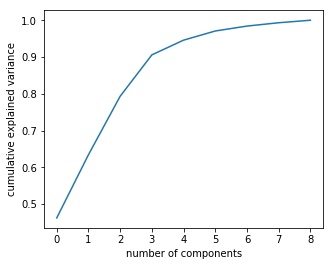

In [24]:
print(pca.explained_variance_ratio_)
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (5,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## 4 components is enough to describe 95% of the data set

In [25]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [26]:
df_train_pca = pca_final.fit_transform(X)
df_train_pca.shape

(167, 4)

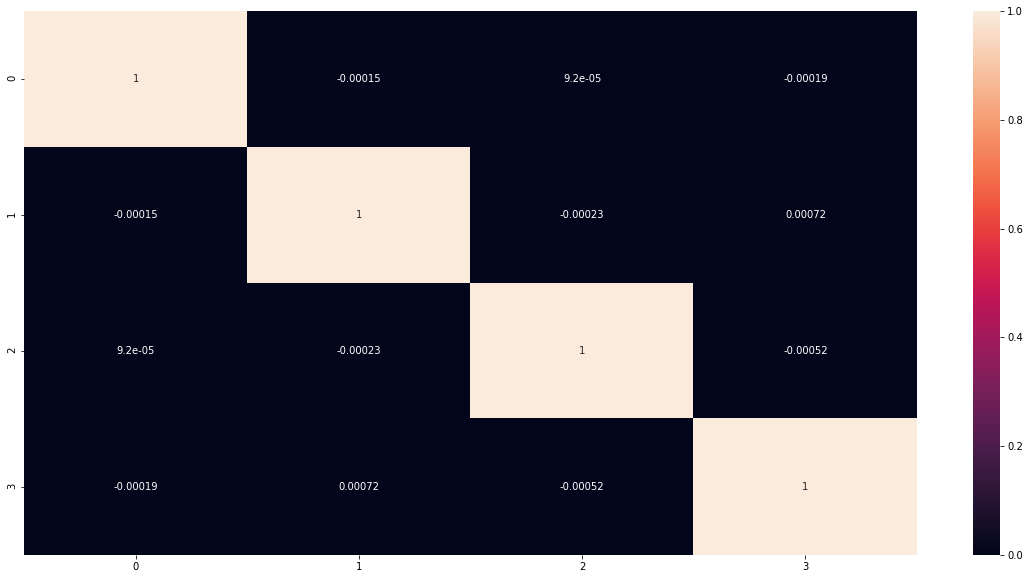

In [27]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())
#plotting the correlation matrix

plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

### NO Columns are related

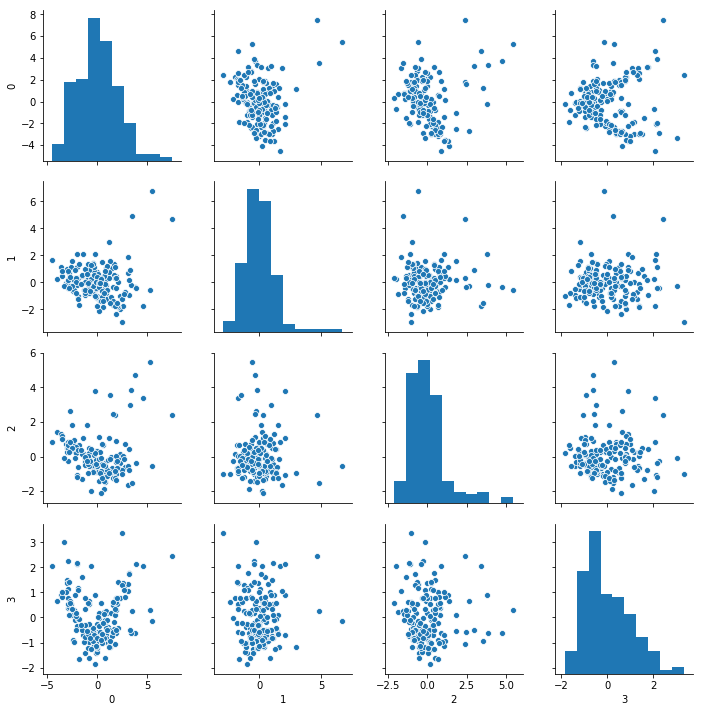

In [28]:
df_train_pca_df=pd.DataFrame(df_train_pca)
sns.pairplot(df_train_pca_df)

In [29]:
# adding back the counties column
Countrydf_pca = pd.concat([df_train_pca_df,y],axis=1)
Countrydf_pca.columns = ['PC1', 'PC2','PC3','PC4',"country"]
Countrydf_pca.head(10)

,PC1,PC2,PC3,PC4,country
0,-2.9607,0.0623,0.2649,1.1495,Afghanistan
1,0.2557,-0.5164,-0.9224,-0.8816,Albania
2,-0.0812,-0.4693,0.3124,-1.2461,Algeria
3,-2.5290,1.5597,1.8185,0.0901,Angola
4,0.8179,0.1884,-0.6554,-0.7039,Antigua and Barbuda
5,0.5563,-1.8270,0.6691,-0.2052,Argentina
6,-0.1795,-0.5228,-0.5213,-1.4194,Armenia
7,2.2512,-1.9944,0.1630,0.7963,Australia
8,2.7882,-0.6823,-0.6271,1.3080,Austria
9,-0.0056,-0.4213,0.3486,-0.7202,Azerbaijan


### lets removed the outliers

In [30]:
Countrydf_pca_no_outliers = Countrydf_pca.copy()

PC1 before


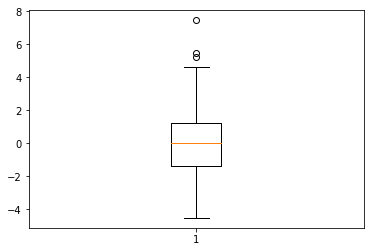

PC1 after


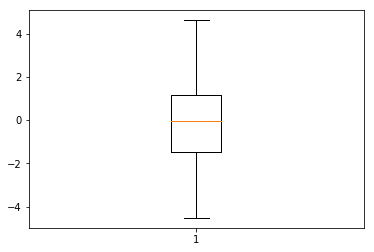

In [31]:
print("PC1 before")
plt.boxplot(Countrydf_pca_no_outliers.PC1)
plt.show()
Q1 = Countrydf_pca_no_outliers.PC1.quantile(0.25)
Q3 = Countrydf_pca_no_outliers.PC1.quantile(0.75)
IQR = Q3 - Q1
Countrydf_pca_no_outliers = Countrydf_pca_no_outliers[(Countrydf_pca_no_outliers.PC1 >= Q1 - 1.5*IQR) & (Countrydf_pca_no_outliers.PC1 <= Q3 + 1.5*IQR)]
print("PC1 after")
plt.boxplot(Countrydf_pca_no_outliers.PC1)
plt.show()

PC2 before


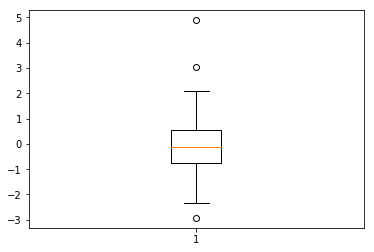

PC2 after


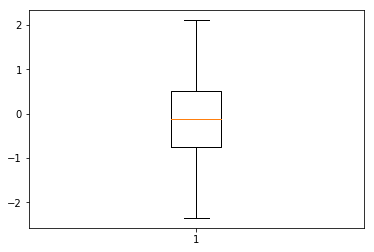

In [32]:
print("PC2 before")
plt.boxplot(Countrydf_pca_no_outliers.PC2)
plt.show()
Q1 = Countrydf_pca_no_outliers.PC2.quantile(0.25)
Q3 = Countrydf_pca_no_outliers.PC2.quantile(0.75)
IQR = Q3 - Q1
Countrydf_pca_no_outliers = Countrydf_pca_no_outliers[(Countrydf_pca_no_outliers.PC2 >= Q1 - 1.5*IQR) & (Countrydf_pca_no_outliers.PC2 <= Q3 + 1.5*IQR)]
print("PC2 after")
plt.boxplot(Countrydf_pca_no_outliers.PC2)
plt.show()

PC3 before


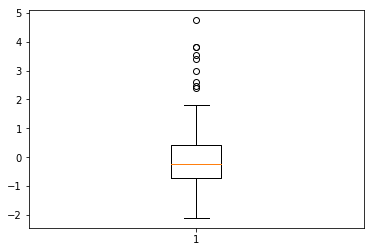

PC3 after


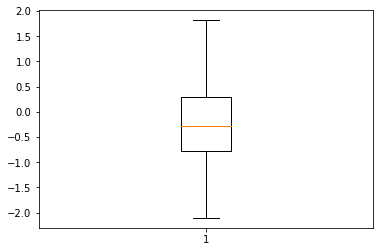

In [33]:
print("PC3 before")
plt.boxplot(Countrydf_pca_no_outliers.PC3)
plt.show()
Q1 = Countrydf_pca_no_outliers.PC3.quantile(0.25)
Q3 = Countrydf_pca_no_outliers.PC3.quantile(0.75)
IQR = Q3 - Q1
Countrydf_pca_no_outliers = Countrydf_pca_no_outliers[(Countrydf_pca_no_outliers.PC3 >= Q1 - 1.5*IQR) & (Countrydf_pca_no_outliers.PC3 <= Q3 + 1.5*IQR)]
print("PC3 after")
plt.boxplot(Countrydf_pca_no_outliers.PC3)
plt.show()

PC4 before


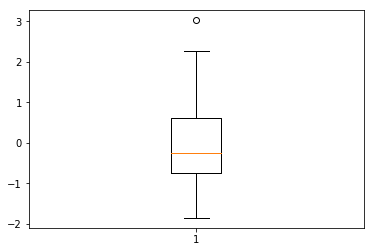

PC4 after


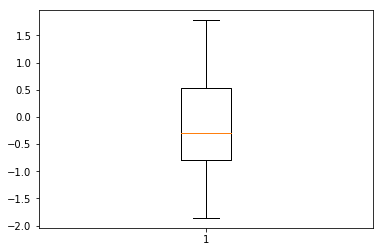

In [34]:
print("PC4 before")
plt.boxplot(Countrydf_pca_no_outliers.PC4)
plt.show()
Q1 = Countrydf_pca_no_outliers.PC3.quantile(0.25)
Q3 = Countrydf_pca_no_outliers.PC3.quantile(0.75)
IQR = Q3 - Q1
Countrydf_pca_no_outliers = Countrydf_pca_no_outliers[(Countrydf_pca_no_outliers.PC4 >= Q1 - 1.5*IQR) & (Countrydf_pca_no_outliers.PC4 <= Q3 + 1.5*IQR)]
print("PC4 after")
plt.boxplot(Countrydf_pca_no_outliers.PC4)
plt.show()

In [35]:
Countrydf_pca_no_outliers.shape

(145, 5)

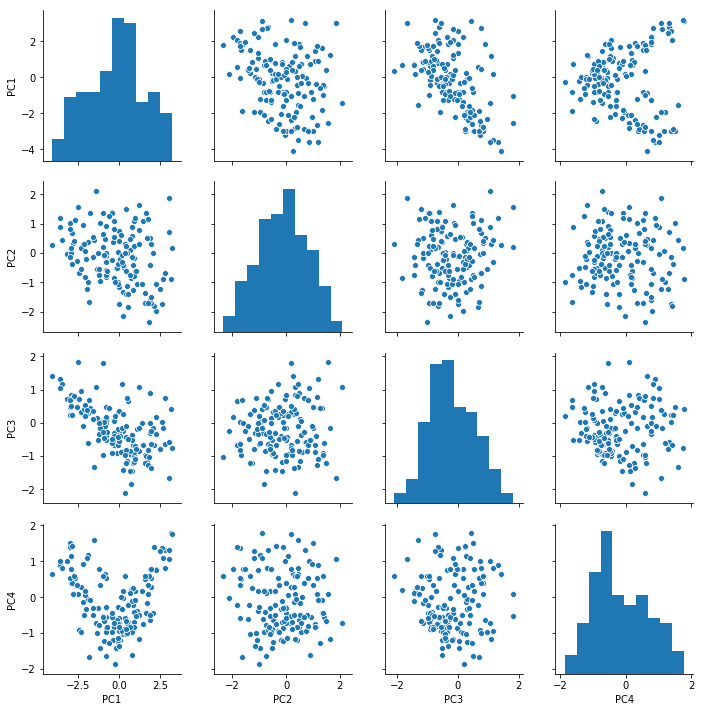

In [36]:
sns.pairplot(Countrydf_pca_no_outliers)

### much better distribution with no outliers

In [37]:
Countrydf_pca_no_outliers.shape

(145, 5)

In [38]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [39]:

print(hopkins(Countrydf_pca_no_outliers[["PC1","PC2","PC3","PC4"]]))
X=Countrydf_pca_no_outliers[["PC1","PC2","PC3","PC4"]]
X.shape

0.6775500708064948


(145, 4)

## Silhouette Analysis

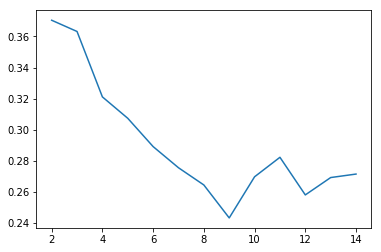

In [40]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, silhouette_score(X, kmeans.labels_)])
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Sum of Squared Distances

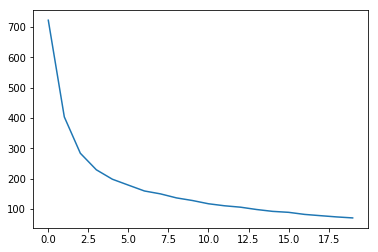

In [41]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(X)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [42]:
X.head(10)

,PC1,PC2,PC3,PC4
0,-2.9607,0.0623,0.2649,1.1495
1,0.2557,-0.5164,-0.9224,-0.8816
2,-0.0812,-0.4693,0.3124,-1.2461
3,-2.5290,1.5597,1.8185,0.0901
4,0.8179,0.1884,-0.6554,-0.7039
5,0.5563,-1.8270,0.6691,-0.2052
6,-0.1795,-0.5228,-0.5213,-1.4194
7,2.2512,-1.9944,0.1630,0.7963
8,2.7882,-0.6823,-0.6271,1.3080
9,-0.0056,-0.4213,0.3486,-0.7202


## Picking clusters as 3

(145, 6)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


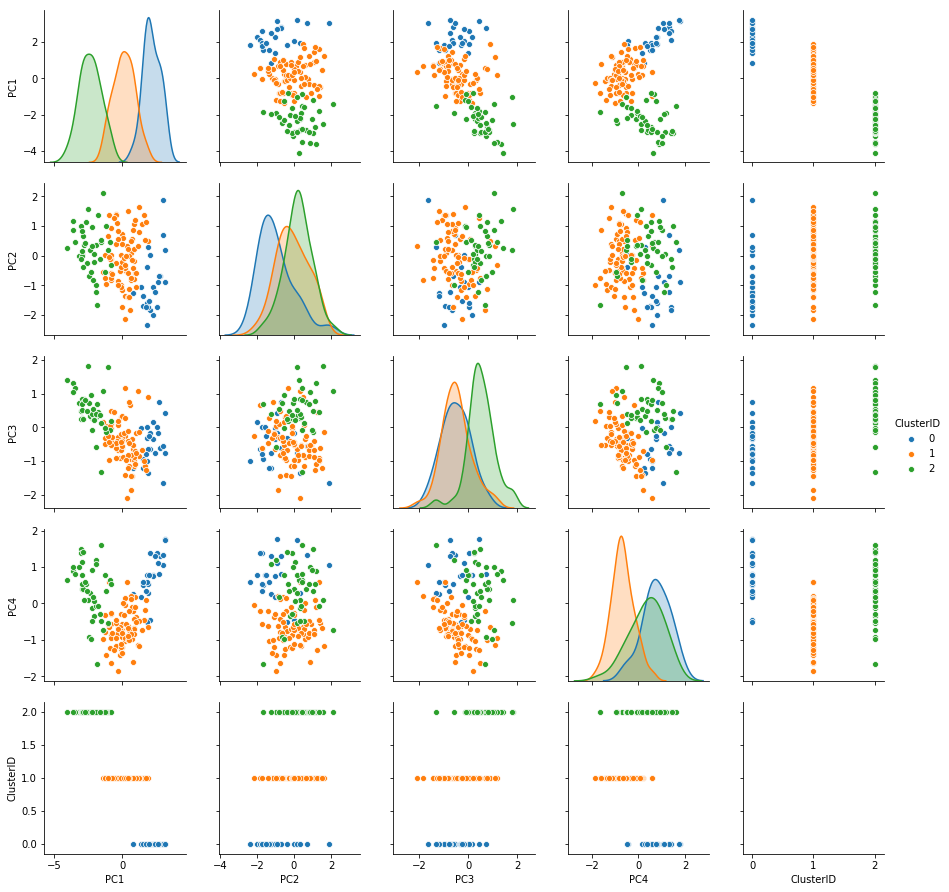

In [43]:
model_clus5 = KMeans(n_clusters = 3, max_iter=50)
model_clus5.fit(X)
Countrydf_pca_no_outliers.index = pd.RangeIndex(len(Countrydf_pca_no_outliers.index))
X_km = pd.concat([Countrydf_pca_no_outliers, pd.Series(model_clus5.labels_)], axis=1)
X_km.columns = ["PC1","PC2","PC3","PC4","country",'ClusterID']
print(X_km.shape)
sns.pairplot(X_km,hue="ClusterID")

## Lets pick 4 as the number of clusters

In [44]:
# Kmeans with K=4
model_clus5 = KMeans(n_clusters = 4, max_iter=50)
model_clus5.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
 pd.Series(model_clus5.labels_).head()

0    2
1    0
2    0
3    2
4    3
dtype: int32

In [46]:
Countrydf_pca_no_outliers.head()

,PC1,PC2,PC3,PC4,country
0,-2.9607,0.0623,0.2649,1.1495,Afghanistan
1,0.2557,-0.5164,-0.9224,-0.8816,Albania
2,-0.0812,-0.4693,0.3124,-1.2461,Algeria
3,-2.5290,1.5597,1.8185,0.0901,Angola
4,0.8179,0.1884,-0.6554,-0.7039,Antigua and Barbuda


In [47]:
Countrydf_pca_no_outliers.index = pd.RangeIndex(len(Countrydf_pca_no_outliers.index))
X_km = pd.concat([Countrydf_pca_no_outliers, pd.Series(model_clus5.labels_)], axis=1)
X_km.head()

,PC1,PC2,PC3,PC4,country,0
0,-2.9607,0.0623,0.2649,1.1495,Afghanistan,2
1,0.2557,-0.5164,-0.9224,-0.8816,Albania,0
2,-0.0812,-0.4693,0.3124,-1.2461,Algeria,0
3,-2.5290,1.5597,1.8185,0.0901,Angola,2
4,0.8179,0.1884,-0.6554,-0.7039,Antigua and Barbuda,3


In [48]:
X_km.columns = ["PC1","PC2","PC3","PC4","country",'ClusterID']
print(X_km.shape)
X_km.head()

(145, 6)


,PC1,PC2,PC3,PC4,country,ClusterID
0,-2.9607,0.0623,0.2649,1.1495,Afghanistan,2
1,0.2557,-0.5164,-0.9224,-0.8816,Albania,0
2,-0.0812,-0.4693,0.3124,-1.2461,Algeria,0
3,-2.5290,1.5597,1.8185,0.0901,Angola,2
4,0.8179,0.1884,-0.6554,-0.7039,Antigua and Barbuda,3


### analysing the clusters formed

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


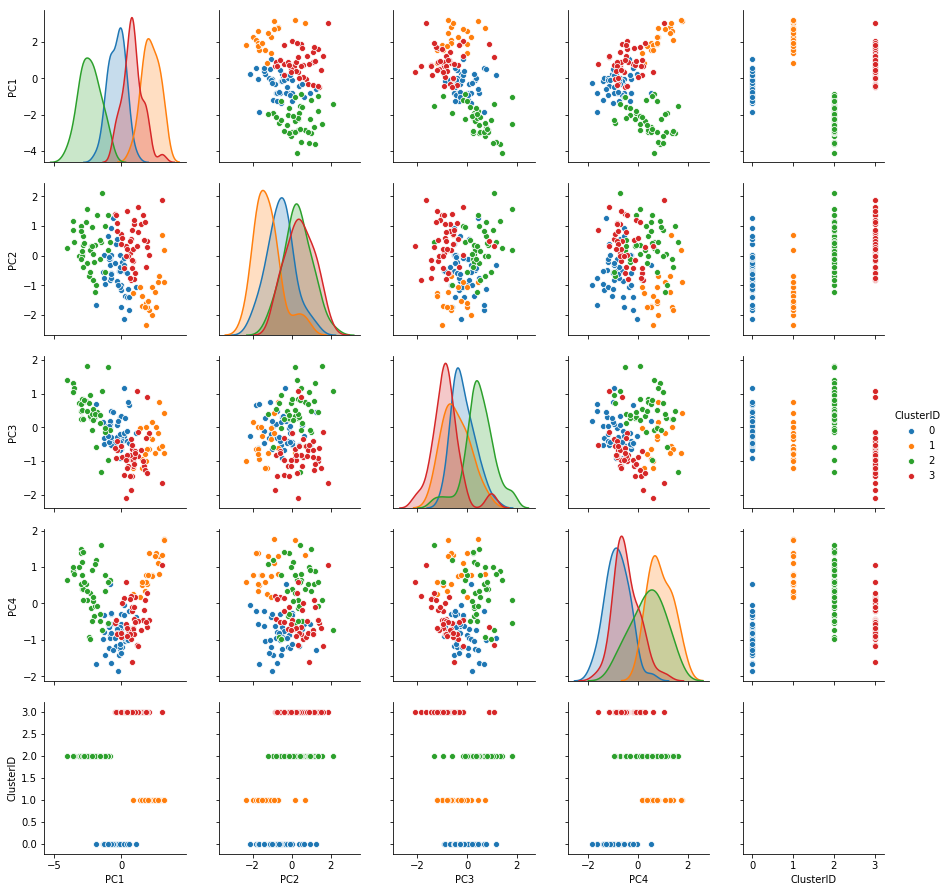

In [49]:
sns.pairplot(X_km,hue="ClusterID")

# 3 cluster results in a good clustering
# but 4 cluster is chosen as we need to saprate the real countries in dire need of help

## adding the clusterid to the orignal data from  

In [50]:
country_cluster_df=Countrydf_normalied.merge(X_km, left_on='country', right_on='country')
country_cluster_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,1.2877,-1.1349,0.2783,-0.0822,-0.8058,-0.4636,-1.6142,1.8972,-0.6771,-2.9607,0.0623,0.2649,1.1495,2
1,Albania,-0.5373,-0.4782,-0.0967,0.0706,-0.3742,-0.3486,0.6459,-0.8574,-0.4842,0.2557,-0.5164,-0.9224,-0.8816,0
2,Algeria,-0.2720,-0.0988,-0.9632,-0.6398,-0.2202,0.1190,0.6684,-0.0383,-0.4640,-0.0812,-0.4693,0.3124,-1.2461,0
3,Angola,2.0018,0.7731,-1.4437,-0.1648,-0.5833,0.1826,-1.1757,2.1218,-0.5147,-2.5290,1.5597,1.8185,0.0901,2
4,Antigua and Barbuda,-0.6935,0.1602,-0.2860,0.4961,0.1014,-0.3556,0.7021,-0.5403,-0.0417,0.8179,0.1884,-0.6554,-0.7039,3


In [51]:
country_cluster_df=country_cluster_df.dropna()
country_cluster_df=country_cluster_df[["country","child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp","ClusterID"]]
country_cluster_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,1.2877,-1.1349,0.2783,-0.0822,-0.8058,-0.4636,-1.6142,1.8972,-0.6771,2
1,Albania,-0.5373,-0.4782,-0.0967,0.0706,-0.3742,-0.3486,0.6459,-0.8574,-0.4842,0
2,Algeria,-0.2720,-0.0988,-0.9632,-0.6398,-0.2202,0.1190,0.6684,-0.0383,-0.4640,0
3,Angola,2.0018,0.7731,-1.4437,-0.1648,-0.5833,0.1826,-1.1757,2.1218,-0.5147,2
4,Antigua and Barbuda,-0.6935,0.1602,-0.2860,0.4961,0.1014,-0.3556,0.7021,-0.5403,-0.0417,3


In [52]:
country_cluster_df.shape

(145, 11)

## analysing the clusters with thier orginal parameters

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


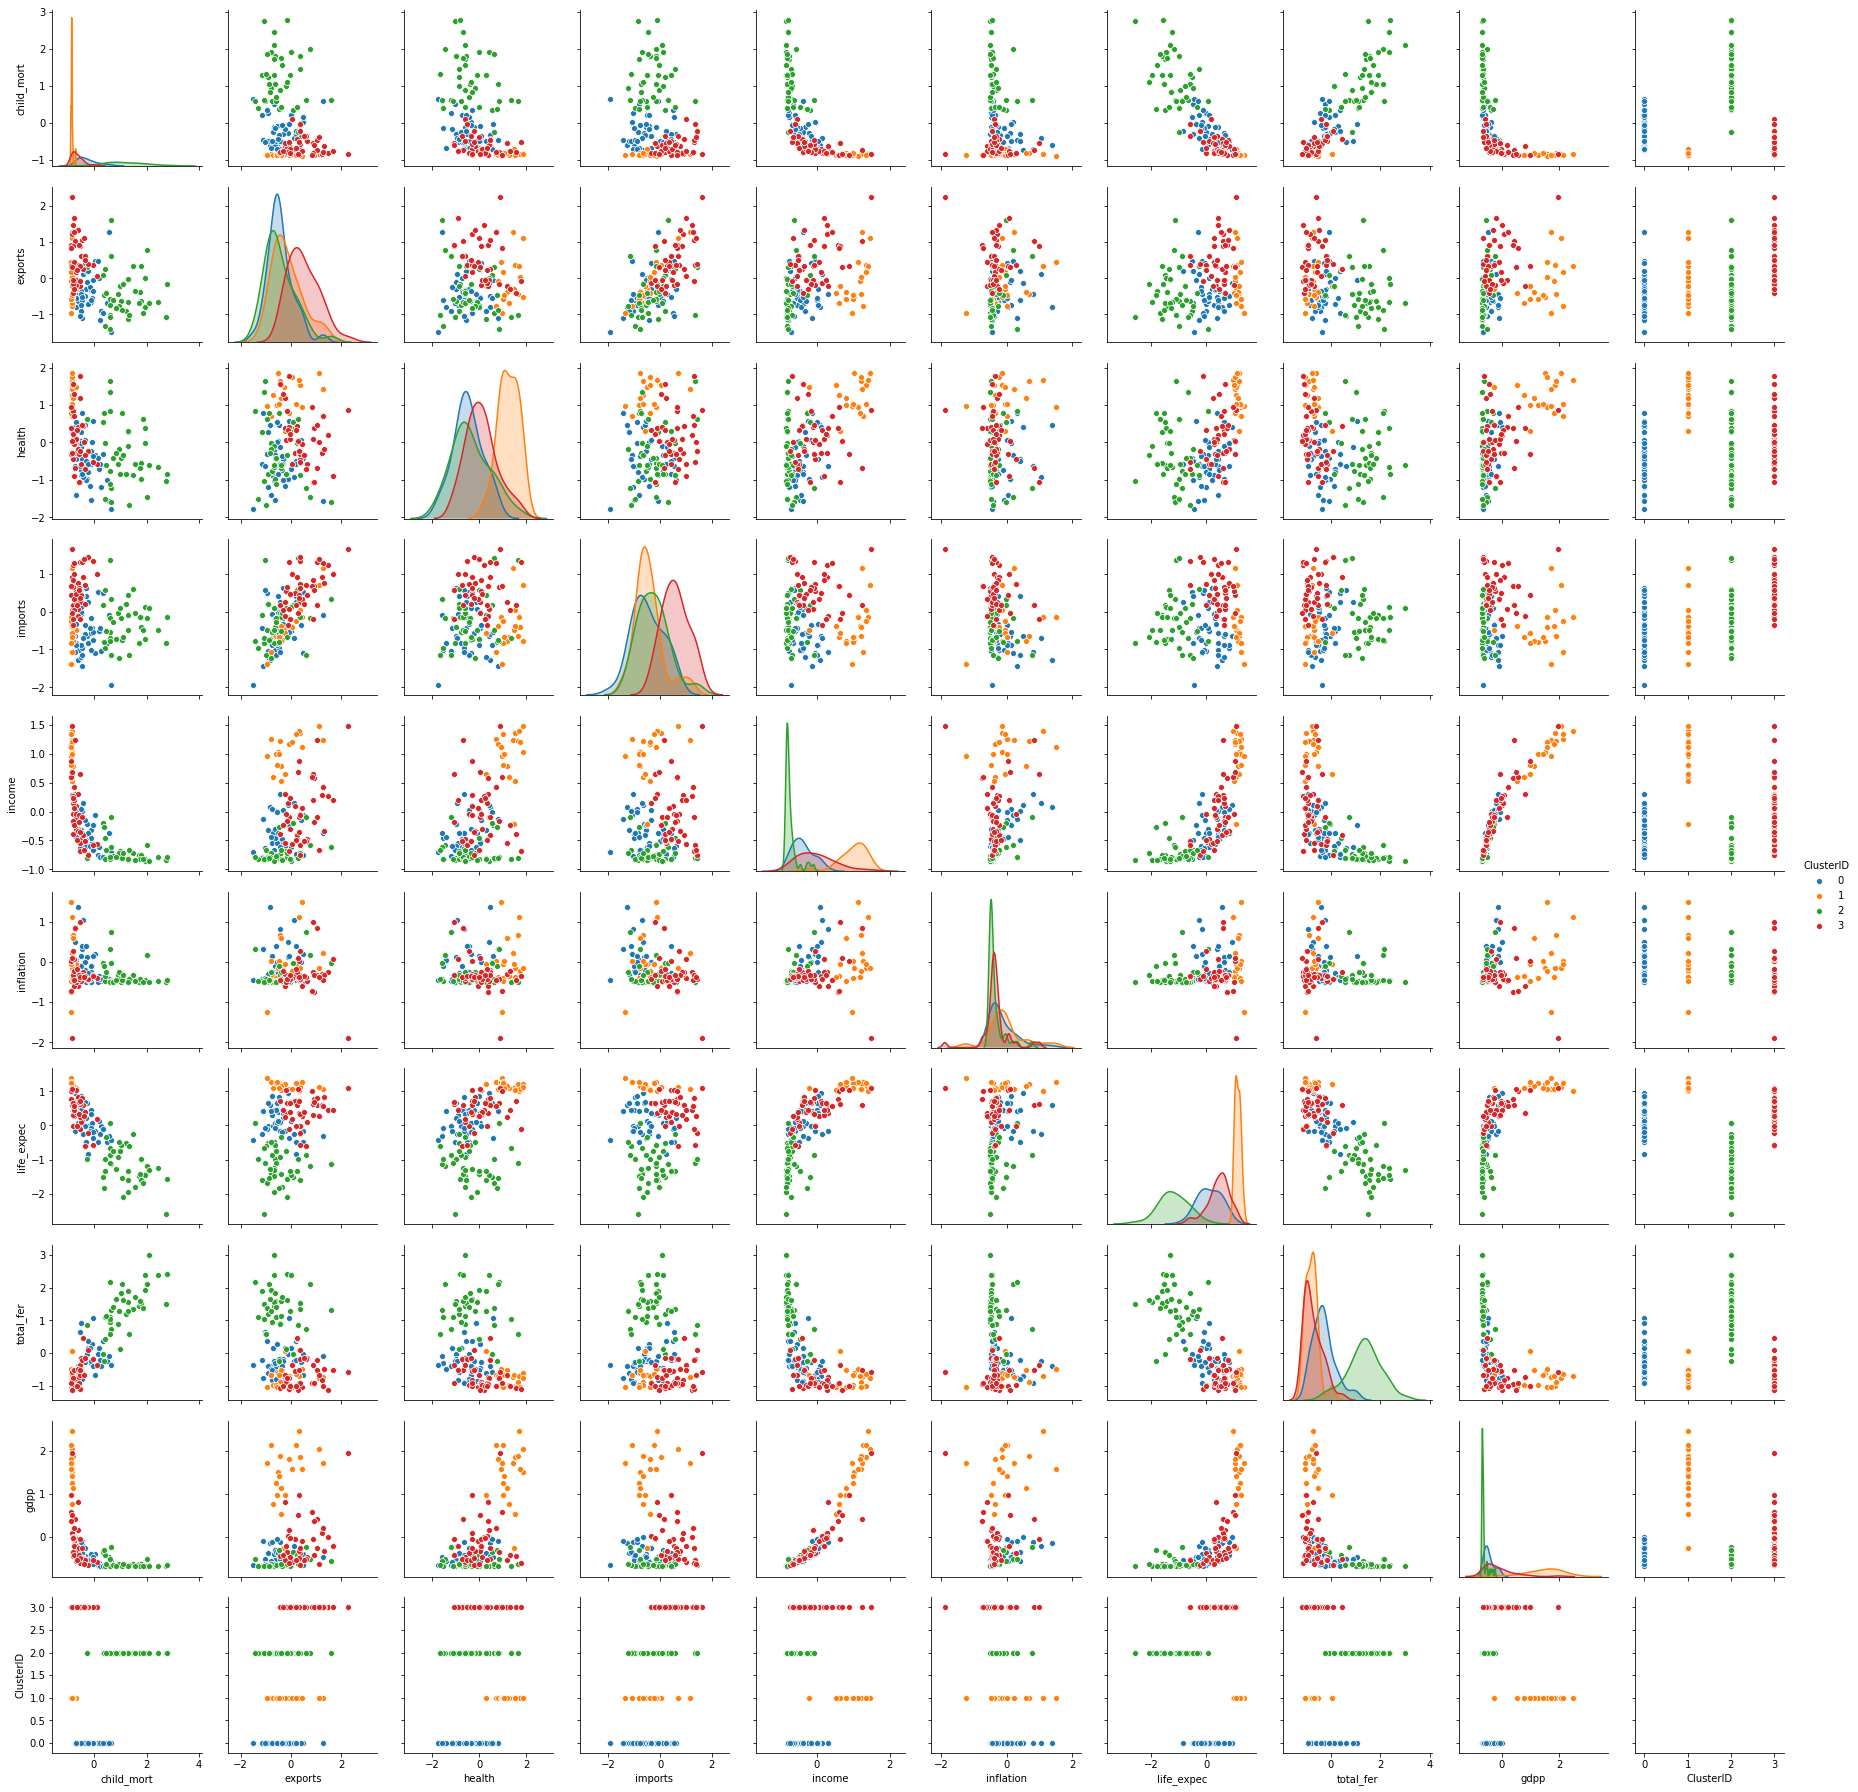

In [53]:
sns.pairplot(country_cluster_df,hue="ClusterID")

### clustering again by adding the outliers

In [54]:
pred=model_clus5.predict(Countrydf_pca.drop(['country'],axis=1))
pred=pd.Series(pred)

In [55]:
X_km_full = pd.concat([Countrydf_normalied,pred], axis=1)
X_km_full.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0
0,Afghanistan,1.2877,-1.1349,0.2783,-0.0822,-0.8058,-0.4636,-1.6142,1.8972,-0.6771,2
1,Albania,-0.5373,-0.4782,-0.0967,0.0706,-0.3742,-0.3486,0.6459,-0.8574,-0.4842,0
2,Algeria,-0.2720,-0.0988,-0.9632,-0.6398,-0.2202,0.1190,0.6684,-0.0383,-0.4640,0
3,Angola,2.0018,0.7731,-1.4437,-0.1648,-0.5833,0.1826,-1.1757,2.1218,-0.5147,2
4,Antigua and Barbuda,-0.6935,0.1602,-0.2860,0.4961,0.1014,-0.3556,0.7021,-0.5403,-0.0417,3


In [56]:

X_km_full.columns = ["country","child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp","ClusterID"]
print(X_km_full.shape)
X_km_full.head()

(167, 11)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,1.2877,-1.1349,0.2783,-0.0822,-0.8058,-0.4636,-1.6142,1.8972,-0.6771,2
1,Albania,-0.5373,-0.4782,-0.0967,0.0706,-0.3742,-0.3486,0.6459,-0.8574,-0.4842,0
2,Algeria,-0.2720,-0.0988,-0.9632,-0.6398,-0.2202,0.1190,0.6684,-0.0383,-0.4640,0
3,Angola,2.0018,0.7731,-1.4437,-0.1648,-0.5833,0.1826,-1.1757,2.1218,-0.5147,2
4,Antigua and Barbuda,-0.6935,0.1602,-0.2860,0.4961,0.1014,-0.3556,0.7021,-0.5403,-0.0417,3


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


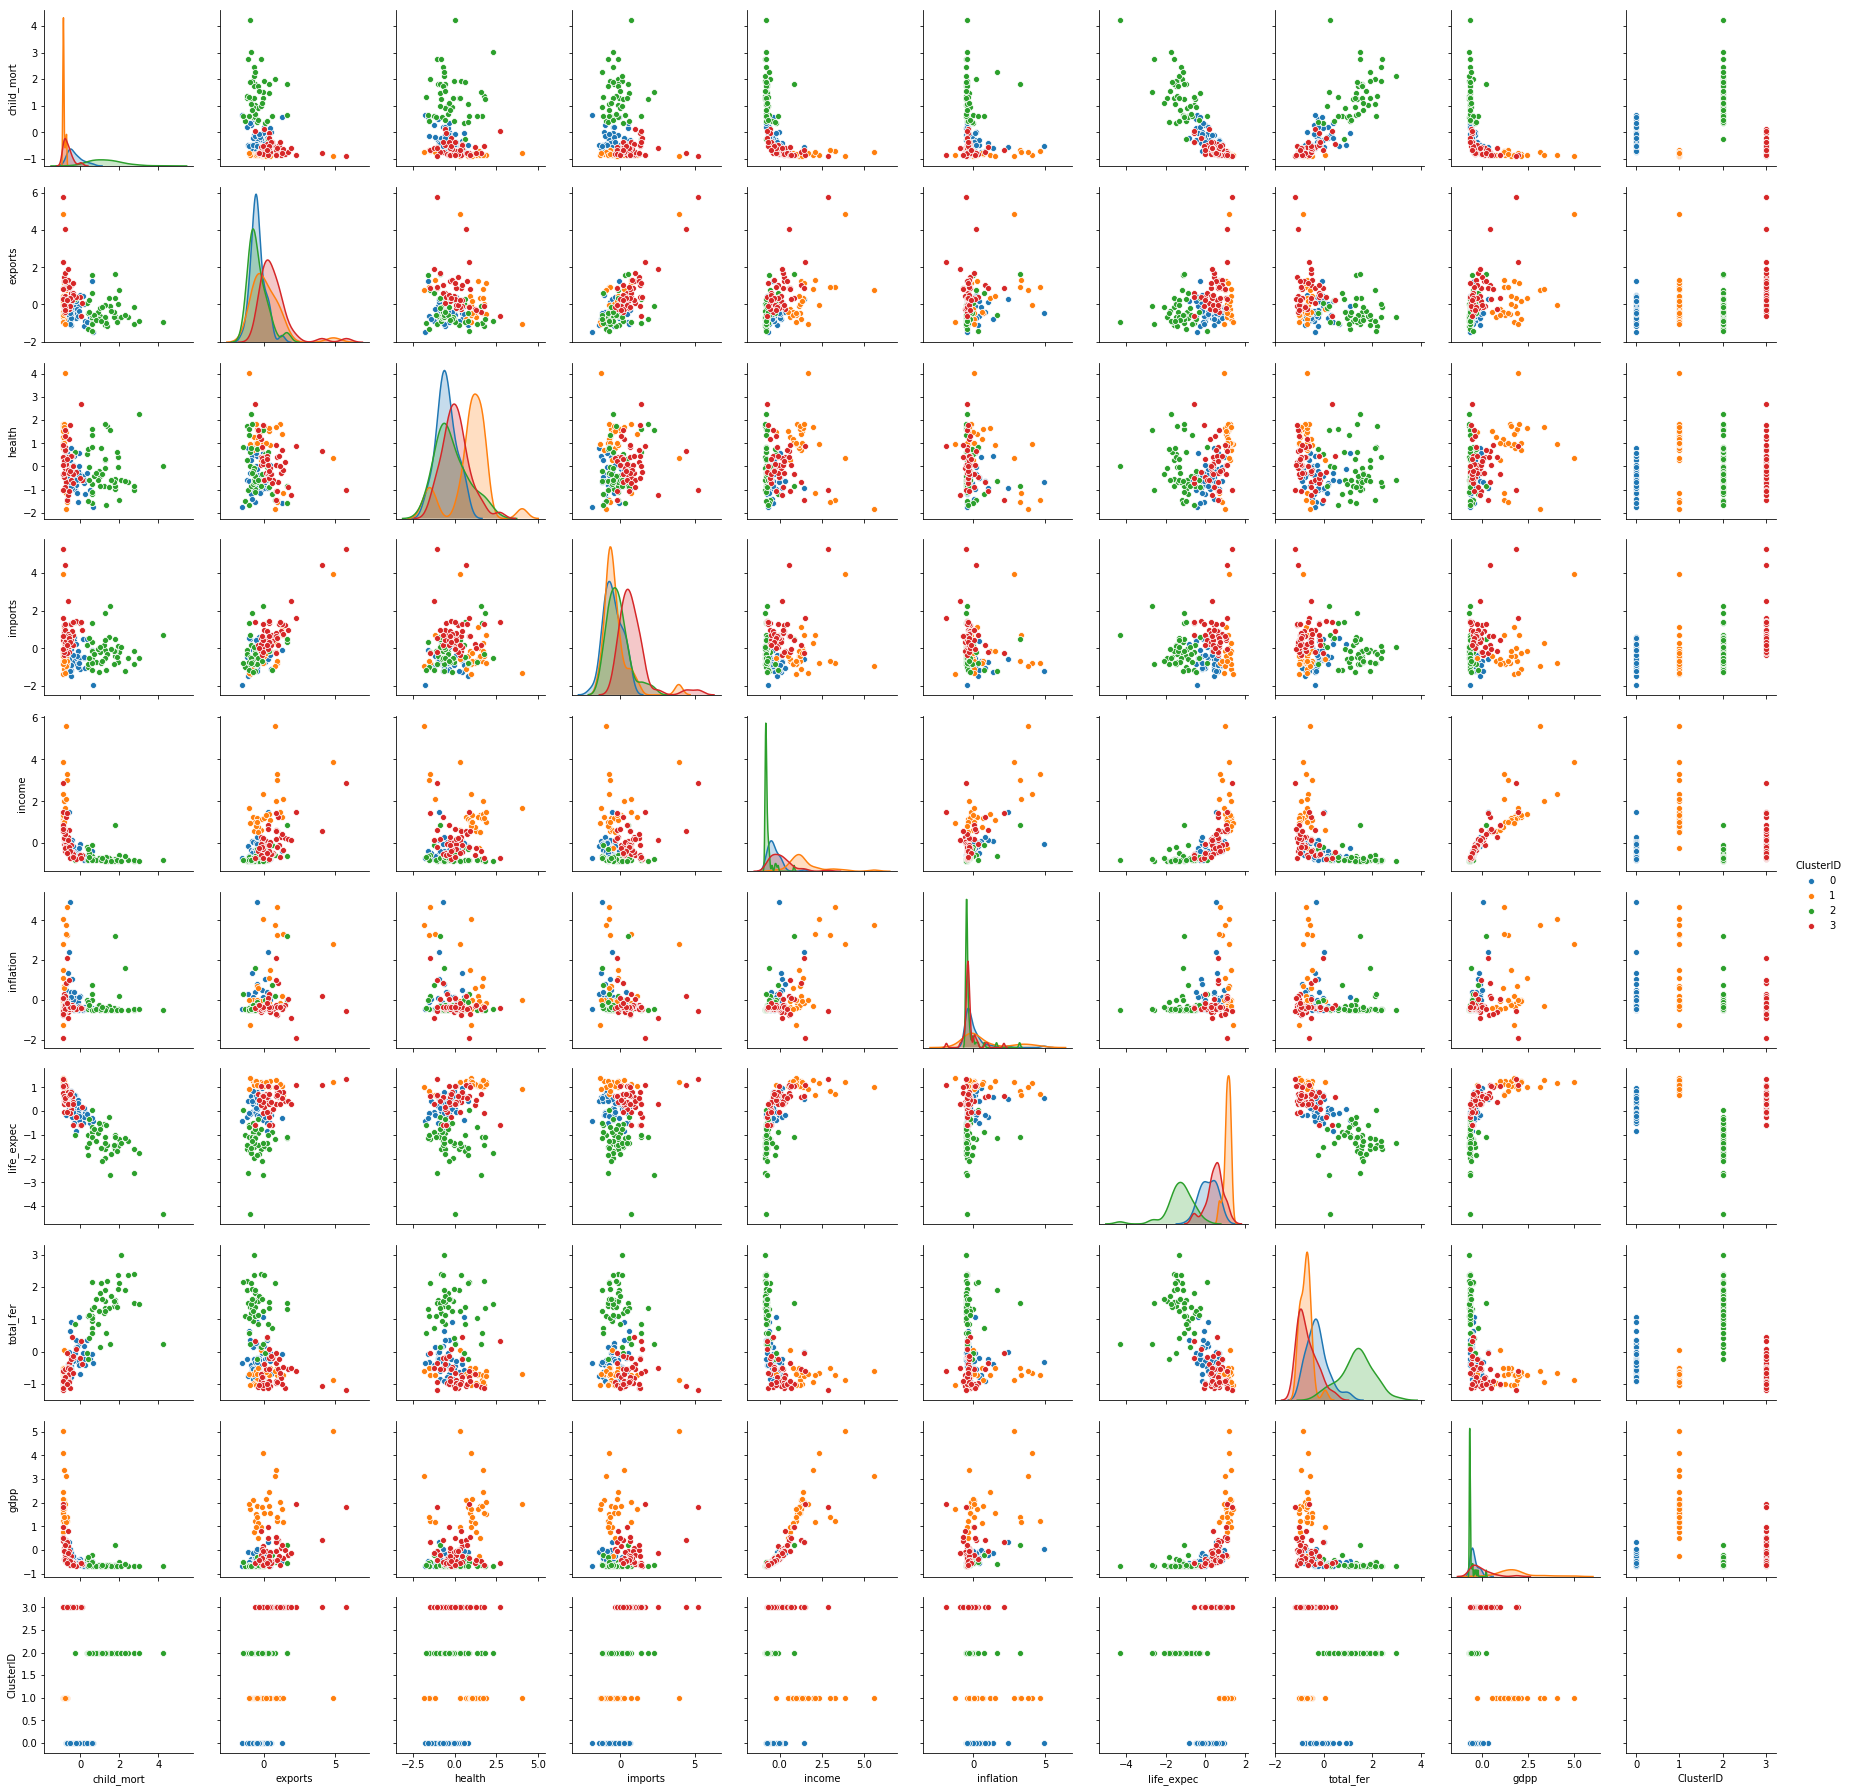

In [57]:
sns.pairplot(X_km_full,hue="ClusterID")

## Hierarchical Clustering with out outliers

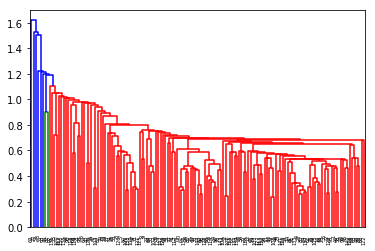

In [58]:
# heirarchical clustering
mergings = linkage(X, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

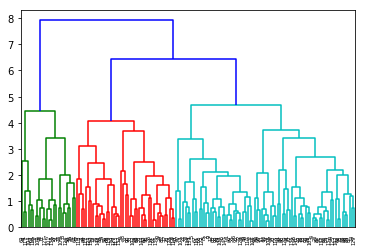

In [59]:
mergings = linkage(X, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [60]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
cluster = pd.concat([Countrydf_pca_no_outliers, clusterCut], axis=1)
cluster.columns = ["PC1","PC2","PC3","PC4","country",'ClusterID']
cluster.head()

,PC1,PC2,PC3,PC4,country,ClusterID
0,-2.9607,0.0623,0.2649,1.1495,Afghanistan,0
1,0.2557,-0.5164,-0.9224,-0.8816,Albania,1
2,-0.0812,-0.4693,0.3124,-1.2461,Algeria,1
3,-2.5290,1.5597,1.8185,0.0901,Angola,0
4,0.8179,0.1884,-0.6554,-0.7039,Antigua and Barbuda,2


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


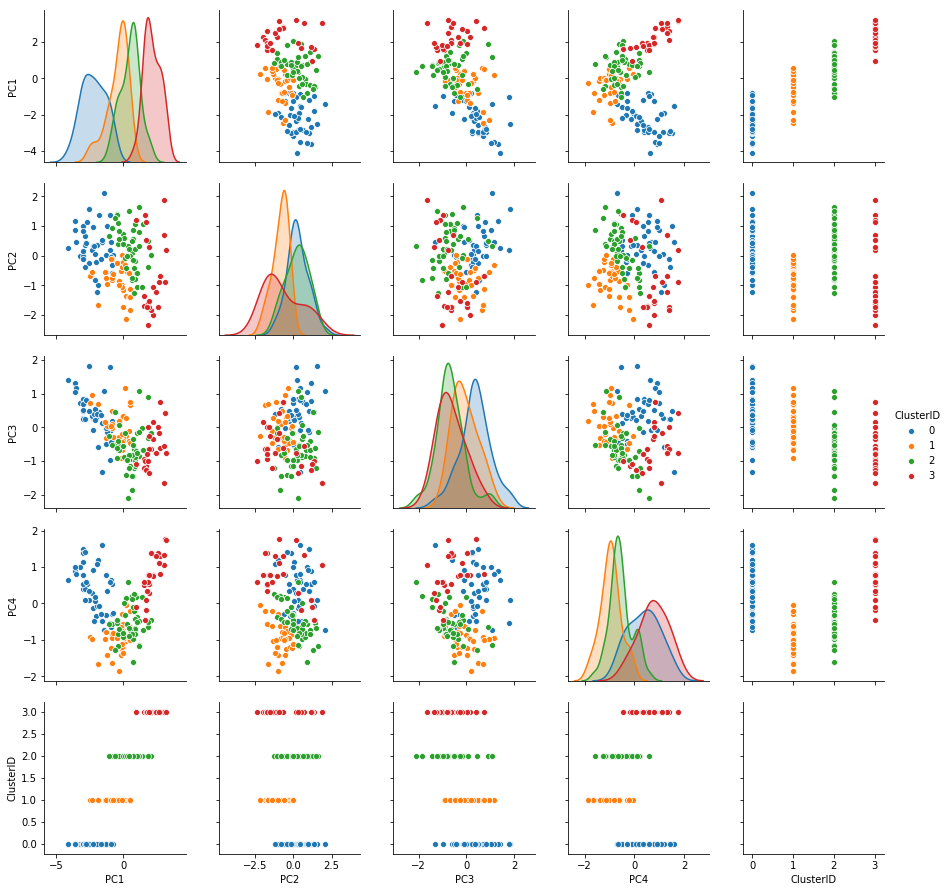

In [61]:
sns.pairplot(cluster,hue="ClusterID")

# Analysing the cluster from k means

In [62]:
df_clus=pd.concat([Countrydf,X_km_full["ClusterID"]], axis=1)
df_clus.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,52.2032,56.2000,5.8200,553,2
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,183.6410,76.3000,1.6500,4090,0
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,718.0600,76.5000,2.8900,4460,0
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,790.7200,60.1000,6.1600,3530,2
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,175.6800,76.8000,2.1300,12200,3


In [63]:
df_clus_child_mort = pd.DataFrame(df_clus.groupby(["ClusterID"]).child_mort.mean())
df_clus_exports =pd.DataFrame(df_clus.groupby(["ClusterID"]).exports.mean())
df_clus_health = pd.DataFrame(df_clus.groupby(["ClusterID"]).health.mean())
df_clus_imports =pd.DataFrame(df_clus.groupby(["ClusterID"]).imports.mean())
df_clus_income =pd.DataFrame(df_clus.groupby(["ClusterID"]).income.mean())
df_clus_inflation =pd.DataFrame(df_clus.groupby(["ClusterID"]).inflation.mean())
df_clus_life_expect =pd.DataFrame(df_clus.groupby(["ClusterID"]).life_expec.mean())
df_clusl_total_fer =pd.DataFrame(df_clus.groupby(["ClusterID"]).total_fer.mean())
df_clus_gdpp =pd.DataFrame(df_clus.groupby(["ClusterID"]).gdpp.mean())
df_clus_gdpp

,gdpp
ClusterID,
0,"5,373.9565"
1,"46,007.1429"
2,"1,854.0851"
3,"11,792.8261"


In [64]:
df_mean = pd.concat([pd.Series([0,1,2,3]),df_clus_gdpp,df_clusl_total_fer,df_clus_life_expect,df_clus_inflation,df_clus_imports,df_clus_income,df_clus_health,df_clus_exports,df_clus_child_mort], axis=1)
df_mean.columns =["ClusterID","gdpp_mean","total_fer_mean","life_expec_mean","inflation_mean","imports_mean","income_mean","health_mean","exports_mean","child_mort_mean"]
df_mean.head()

,ClusterID,gdpp_mean,total_fer_mean,life_expec_mean,inflation_mean,imports_mean,income_mean,health_mean,exports_mean,child_mort_mean
0,0,"5,373.9565",2.5515,72.0000,636.5220,34.9514,"10,803.0435",5.4824,29.9454,27.6196
1,1,"46,007.1429",1.8264,80.4679,"1,469.5359",39.8571,"47,267.8571",9.3654,47.0036,5.2321
2,2,"1,854.0851",5.0013,59.0702,305.1279,43.3255,"3,710.0638",6.3915,29.3619,92.7745
3,3,"11,792.8261",1.9291,74.8130,270.1876,66.7522,"18,877.1739",7.0304,60.6870,13.3413


## Visualization of the clusters 

Gdpp


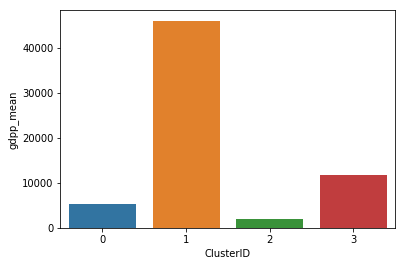

In [65]:
#analysing Gdpp with cluster
sns.barplot(x=df_mean.ClusterID, y=df_mean.gdpp_mean)
print("Gdpp")

total_fer


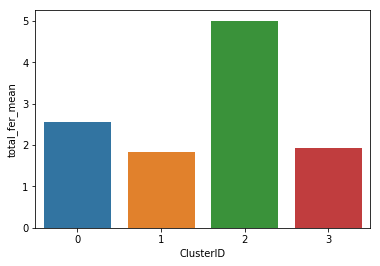

In [66]:
#analysing total_fer with cluster
sns.barplot(x=df_mean.ClusterID, y=df_mean.total_fer_mean)
print("total_fer")

life_expec


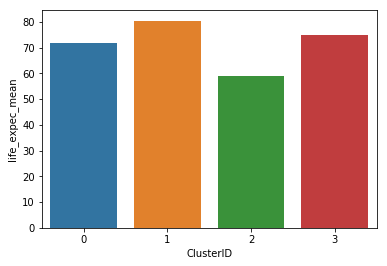

In [67]:
#analysing life_expec with cluster
sns.barplot(x=df_mean.ClusterID, y=df_mean.life_expec_mean)
print("life_expec")

inflation


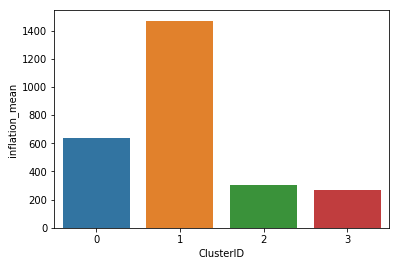

In [68]:
#analysing inflation with cluster
sns.barplot(x=df_mean.ClusterID, y=df_mean.inflation_mean)
print("inflation")

imports


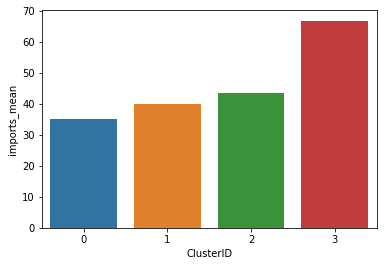

In [69]:
#analysing imports with cluster
sns.barplot(x=df_mean.ClusterID, y=df_mean.imports_mean)
print("imports")

income


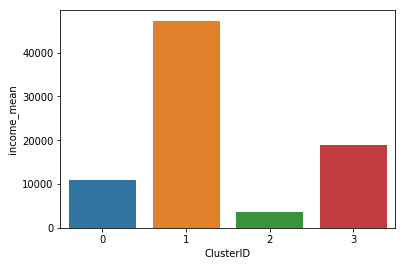

In [70]:
#analysing income with cluster
sns.barplot(x=df_mean.ClusterID, y=df_mean.income_mean)
print("income")

health


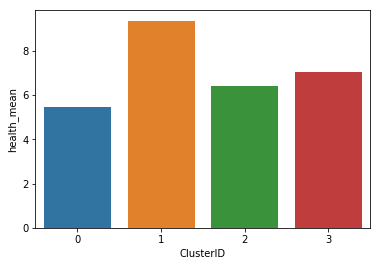

In [71]:
#analysing health with cluster
sns.barplot(x=df_mean.ClusterID, y=df_mean.health_mean)
print("health")

exports


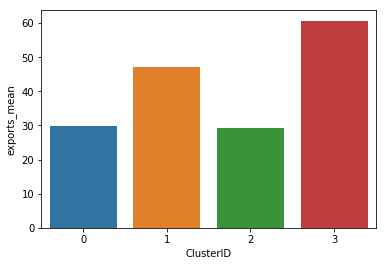

In [72]:
#analysing exports with cluster
sns.barplot(x=df_mean.ClusterID, y=df_mean.exports_mean)
print("exports")

child_mort


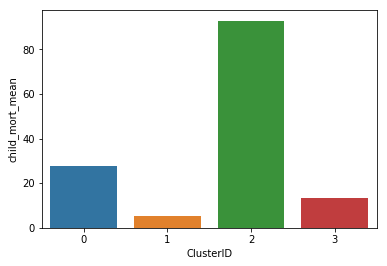

In [73]:
#analysing child_mort with cluster
sns.barplot(x=df_mean.ClusterID, y=df_mean.child_mort_mean)
print("child_mort")

# basic features of clusters observed from the graph 
## cluster number will change with rerun

## cluster 1

1. highest income,Gdpp,health,

2. lowest child mortality,fertility

## cluster 2

1. highest fertilty ,child mortality

2. lowest income,gdpp.exports

### this cluster needs the most help
### actual cluster number will change when rerun but countries that need help are as follows:
0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
108                     Namibia
112                       Niger
113                     Nigeria
116                    Pakistan
126                      Rwanda
129                     Senegal
132                Sierra Leone
137                South Africa
142                       Sudan
147                    Tanzania
149                 Timor-Leste
150                        Togo
155                      Uganda
165                       Yemen
166                      Zambia


In [74]:
#cluster 0  country
X_km_full["country"][X_km_full["ClusterID"]==0]

1                             Albania
2                             Algeria
5                           Argentina
6                             Armenia
9                          Azerbaijan
12                         Bangladesh
19                            Bolivia
22                             Brazil
27                           Cambodia
30                         Cape Verde
33                              Chile
34                              China
35                           Colombia
45                 Dominican Republic
46                            Ecuador
47                              Egypt
48                        El Salvador
61                            Grenada
62                          Guatemala
69                              India
70                          Indonesia
71                               Iran
72                               Iraq
76                            Jamaica
79                         Kazakhstan
103                          Mongolia
105         

In [75]:
#cluster 1  country
X_km_full["country"][X_km_full["ClusterID"]==1]

7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
39               Costa Rica
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
110             Netherlands
111             New Zealand
114                  Norway
122                Portugal
123                   Qatar
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object

In [76]:
#cluster 2  country
X_km_full["country"][X_km_full["ClusterID"]==2]

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
108     

In [77]:
#cluster 3  country
X_km_full["country"][X_km_full["ClusterID"]==3]

4         Antigua and Barbuda
10                    Bahamas
11                    Bahrain
13                   Barbados
14                    Belarus
16                     Belize
18                     Bhutan
20     Bosnia and Herzegovina
24                   Bulgaria
41                    Croatia
42                     Cyprus
43             Czech Republic
51                    Estonia
52                       Fiji
57                    Georgia
65                     Guyana
67                    Hungary
73                    Ireland
78                     Jordan
83            Kyrgyz Republic
85                     Latvia
86                    Lebanon
89                      Libya
90                  Lithuania
92             Macedonia, FYR
95                   Malaysia
96                   Maldives
98                      Malta
100                 Mauritius
101     Micronesia, Fed. Sts.
102                   Moldova
104                Montenegro
115                      Oman
117       

## Results

## HELP International must invest in cunties in cluster 2 with low income ,high total fertility
-Results with both clustering technique results in same clusters

-cluster 3 are developing countries with india and china 

-cluster 0 are poor countries than need help

-cluster 2 are countries are counteries with good heath and income

-cluster 1 are countries are counteries that developed and rich countries

### actual cluster number will change when rerun but countries that need help are as follows:
0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
108                     Namibia
112                       Niger
113                     Nigeria
116                    Pakistan
126                      Rwanda
129                     Senegal
132                Sierra Leone
137                South Africa
142                       Sudan
147                    Tanzania
149                 Timor-Leste
150                        Togo
155                      Uganda
165                       Yemen
166                      Zambia



